In [15]:
import urllib.request 
import urllib.parse
import urllib.error
import ssl
import re
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup as BS
import numpy as np
import pandas as pd

ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE


city_urls = [
    'https://www.redfin.com/city/17151/CA/San-Francisco',
    'https://www.redfin.com/city/12204/CA/Milpitas',
    'https://www.redfin.com/city/6671/CA/Fremont',
    'https://www.redfin.com/city/5159/CA/Dublin',
    'https://www.redfin.com/city/17420/CA/San-Jose'
]

individual_urls = []
for url in city_urls:
    for pagenum in range(1,8):
        page_url = url+"/page-"+str(pagenum)
        req = Request(page_url, headers={'User-Agent': 'Mozilla/5.0'})
        webpage = urlopen(req).read()
        soup = BS(webpage,'html.parser')
        pattern=re.compile("^\/CA")
        for x in soup.findAll('a', attrs={'href': pattern }):
            x = "https://www.redfin.com"+ x.get('href')
            if (x not in individual_urls):
                individual_urls.append(x)
print(len(individual_urls))
    


832


In [16]:
street=[]
city_zipcode=[]
no_of_beds=[]
no_of_baths=[]
sq_ft=[]
lot_size=[]
price=[]
walk_score=[]
transit_score=[]
bike_score=[]
property_type=[]
year_built=[]
price_sqft=[]
Walk_rating_scale=[]
Transit_rating_scale=[]
Bike_rating_scale=[]
count=0

In [17]:
for url in individual_urls:
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    webpage = urlopen(req).read()
    soup=BS(webpage,'html.parser')
    sqft=soup.findAll('span',attrs={'class':'statsValue'})
    sq_ft.append(sqft[0].get_text() if len(sqft)>0 else 'NA')
    cityzipcode=soup.findAll('div', attrs={'class':"dp-subtext bp-cityStateZip" })
    city_zipcode.append(cityzipcode[0].get_text() if len(cityzipcode)>0 else 'NA')
    strt=soup.findAll('div', attrs={'class':"street-address" })
    street.append(strt[0].get_text() if len(strt)>0 else 'NA')
    walkscore=soup.findAll('div', attrs={'class': "percentage"})
    try:
        walk_score.append(walkscore[0].get_text()[:2] if len(walkscore)>0 else 'NA')
    except:
        walk_score.append('NA')
    try:
        transit_score.append(walkscore[1].get_text()[:2] if len(walkscore)>0 else 'NA')
    except:
        transit_score.append('NA')
    try:
        bike_score.append(walkscore[2].get_text()[:2] if len(walkscore)>0 else 'NA')
    except:
        bike_score.append('NA')
    pricex=soup.findAll('div', attrs={'class': "statsValue"})
    price.append(pricex[0].get_text().strip('$') if len(pricex)>0 else 'NA')
    noofbeds=soup.findAll('div', attrs={'data-rf-test-id': "abp-beds"})
    no_of_beds.append(noofbeds[0].get_text() if len(noofbeds)>0 else 'NA')
    noofbaths=soup.findAll('div', attrs={'data-rf-test-id': "abp-baths"})
    no_of_baths.append(noofbaths[0].get_text() if len(noofbaths)>0 else 'NA')
    home_facts_section = soup.find('div', class_='KeyDetails--header keyDetails--HomeFacts')
    home_facts_table = home_facts_section.find_next('div', class_='DPTableDisplay')

    # Extract Price insights section
    price_insights_section = soup.find('div', class_='KeyDetails--header keyDetails--PriceInsights')
    price_insights_table = price_insights_section.find_next('div', class_='DPTableDisplay')

    # Extract and print the data from Home facts section
    for row in home_facts_table.find_all('div', class_='table-row'):
        label = row.find('span', class_='table-label').text.strip()
        value = row.find('div', class_='table-value').text.strip()
        if label == 'Year Built' and len(value)>0:
            year_built.append(value) 
        if label == 'Year Built' and len(value)<0:
            year_built.append('NA')
        if label == 'Lot Size' and len(value)>0:
            lot_size.append(value)
        if label == 'Lot Size' and len(value)<0:
            lot_size.append('NA')
        if label == 'Property Type' and len(value)>0:
            property_type.append(value)
        if label == 'Property Type' and len(value)<0:
            property_type.append('NA')

    # Extract and print the data from Price insights section
    for row in price_insights_table.find_all('div', class_='table-row'):
        label = row.find('span', class_='table-label').text.strip()
        value = row.find('div', class_='table-value').text.strip()
        if label=='Price/Sq.Ft.' and len(value)>0:
            price_sqft.append(value)
        if label=='Price/Sq.Ft.' and len(value)<0:
            price_sqft.append('NA')
    x=soup.findAll('div', attrs={'class': "transport-desc-and-label"})
    try:
        Walk_rating=re.search('class="description font-body-base">(.*?)<\/div>',str(x[0])).group(1)
        Walk_rating_scale.append(Walk_rating if len(Walk_rating)>0 else 'NA')
    except:
        Walk_rating_scale.append('NA')
    try:
        Transit_rating=re.search('class="description font-body-base">(.*?)<\/div>',str(x[1])).group(1)
        Transit_rating_scale.append(Transit_rating if len(Transit_rating)>0 else 'NA')
    except:
        Transit_rating_scale.append('NA')
    try:
        bike_rating=re.search('class="description font-body-base">(.*?)<\/div>',str(x[2])).group(1)
        Bike_rating_scale.append(bike_rating if len(bike_rating)>0 else 'NA')
    except:
        Bike_rating_scale.append('NA')
    print(count)
    count+=1


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [18]:
data_frame=pd.DataFrame(list(zip(street,
city_zipcode,
no_of_beds,
no_of_baths,
sq_ft,
lot_size,
price,
walk_score,
transit_score,
bike_score,
property_type,
year_built,
price_sqft,
Walk_rating_scale,
Transit_rating_scale,
Bike_rating_scale)),columns=['street',
'city_zipcode',
'no_of_beds',
'no_of_baths',
'sq_ft',
'lot_size',
'price',
'walk_score',
'transit_score',
'bike_score',
'property_type',
'year_built',
'price_sqft',
'Walk_rating_scale',
'Transit_rating_scale',
'Bike_rating_scale'])

In [19]:
data_frame

,street,city_zipcode,no_of_beds,no_of_baths,sq_ft,lot_size,price,walk_score,transit_score,bike_score,property_type,year_built,price_sqft,Walk_rating_scale,Transit_rating_scale,Bike_rating_scale
0,"238 Olive St #202,","SAN FRANCISCO, CA 94109",2Beds,2Baths,"1,154","2,160 Sq. Ft.","898,000",99,97,79,Condo,2010,$778,Walker's paradise,Rider's paradise,Very bikeable
1,"250 King St #1210,","SAN FRANCISCO, CA 94107",1Bed,1Bath,822,2.43 Acres,"819,000",94,87,90,Condo,2004,$996,Walker's paradise,Excellent transit,Biker's paradise
2,"15 - A Heyman Ave,","San Francisco, CA 94110",3Beds,2Baths,—,"2,996 Sq. Ft.","1,195,000",96,76,70,Condo,1900,$786,Walker's paradise,Excellent transit,Very bikeable
3,"601 Van Ness Ave #40,","San Francisco, CA 94102",2Beds,2Baths,"1,004","3,044 Sq. Ft.","789,000",99,10,99,Condo,1982,"$1,049",Walker's paradise,Rider's paradise,Biker's paradise
4,"1778 10th Ave,","San Francisco, CA 94122",2Beds,2Baths,"1,425","3,711 Sq. Ft.","1,495,000",70,63,54,Single Family Residential,1937,$887,Very walkable,Good transit,Bikeable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,"6754 Gentry Oaks Pl,","SAN JOSE, CA 95138",4Beds,2.5Baths,"2,060","1,556 Sq. Ft.","1,699,000",6/,16,26,Single Family Home,1997,"$1,157",Car-dependent,Minimal transit,Somewhat bikeable
613,"541 Yurok Cir,","SAN JOSE, CA 95123",4Beds,2Baths,"1,345",2.29 Acres,"1,258,000",58,45,61,Single Family Home,1950,$616,Somewhat walkable,Some transit,Bikeable
614,"1660 Hollowcreek Pl,","SAN JOSE, CA 95121",3Beds,2.5Baths,"1,508","1,974 Sq. Ft.","865,000",38,37,57,Townhouse,1970,$840,Car-dependent,Some transit,Bikeable
615,"4269 Sayoko Cir,","SAN JOSE, CA 95136",5Beds,3Baths,"2,236","1,205 Sq. Ft.","1,549,000",44,47,70,Single Family Home,1985,$989,Car-dependent,Some transit,Very bikeable


In [20]:
data_frame.to_excel('redfin_data.xlsx', index=False)


# Data Cleaning

In [21]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   street                617 non-null    object
 1   city_zipcode          617 non-null    object
 2   no_of_beds            617 non-null    object
 3   no_of_baths           617 non-null    object
 4   sq_ft                 617 non-null    object
 5   lot_size              617 non-null    object
 6   price                 617 non-null    object
 7   walk_score            617 non-null    object
 8   transit_score         617 non-null    object
 9   bike_score            617 non-null    object
 10  property_type         617 non-null    object
 11  year_built            617 non-null    object
 12  price_sqft            617 non-null    object
 13  Walk_rating_scale     617 non-null    object
 14  Transit_rating_scale  617 non-null    object
 15  Bike_rating_scale     617 non-null    ob

In [29]:
data_frame.isnull().sum()

street                   0
no_of_beds              37
no_of_baths             39
sq_ft                   30
lot_size                 0
price                    0
walk_score               0
transit_score            0
bike_score               0
property_type            0
year_built               0
price_sqft               0
Walk_rating_scale        0
Transit_rating_scale     0
Bike_rating_scale        0
city                     0
zipcode                  0
dtype: int64

In [23]:
#Seperating city and zipcode and then dropping original column
data_frame['city'] = data_frame['city_zipcode'].apply(lambda x: x.split(',')[0].strip())
data_frame['zipcode'] = data_frame['city_zipcode'].apply(lambda x: x.split(' ')[-1].strip())

data_frame.drop('city_zipcode', axis=1, inplace=True)


In [25]:
#Replacing placeholder '—Beds', '—Baths' and '—' with NaN 
data_frame['no_of_beds'].replace('—Beds', np.nan, inplace=True)
data_frame['no_of_baths'].replace('—Baths', np.nan, inplace=True)
data_frame['sq_ft'].replace('—', np.nan, inplace=True)


In [30]:
#dropping the street column
data_frame.drop('street', axis=1, inplace=True)

In [32]:
# Removing dollar sign and commas, and converting to float
data_frame['price_sqft'] = data_frame['price_sqft'].str.replace('$', '').str.replace(',', '').astype(float)

C:\Users\STSC\AppData\Local\Temp\ipykernel_4032\3229479510.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_frame['price_sqft'] = data_frame['price_sqft'].str.replace('$', '').str.replace(',', '').astype(float)


In [34]:
#converting year_cuilt column to numerical 
data_frame['year_built'] = pd.to_numeric(data_frame['year_built'], errors='coerce')

In [36]:
 # Removing '/' and converting 'walk_score', 'transit_score', 'bike_score' columns to numeric
columns_to_convert = ['walk_score', 'transit_score', 'bike_score']

for col in columns_to_convert:
    data_frame[col] = pd.to_numeric(data_frame[col].str.replace('/', ''), errors='coerce')



In [40]:
# Removing dollar signs, commas, and the plus sign, then convert to float
data_frame['price'] = data_frame['price'].str.replace('$', '').str.replace(',', '').str.replace('+', '').astype(float)


C:\Users\STSC\AppData\Local\Temp\ipykernel_4032\191203011.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_frame['price'] = data_frame['price'].str.replace('$', '').str.replace(',', '').str.replace('+', '').astype(float)


In [42]:
# Converting no_of_beds, no_of_baths to numeric
data_frame['no_of_beds'] = pd.to_numeric(data_frame['no_of_beds'].str.replace('Beds', '').str.replace('Bed', ''), errors='coerce')

data_frame['no_of_baths'] = pd.to_numeric(data_frame['no_of_baths'].str.replace('Baths', '').str.replace('Bath', ''), errors='coerce')

In [44]:
# Converting sq_ft to numeric
data_frame['sq_ft'] = pd.to_numeric(data_frame['sq_ft'].str.replace(',', '').str.replace('Sq. Ft.', ''), errors='coerce')

C:\Users\STSC\AppData\Local\Temp\ipykernel_4032\4140577577.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data_frame['sq_ft'] = pd.to_numeric(data_frame['sq_ft'].str.replace(',', '').str.replace('Sq. Ft.', ''), errors='coerce')


In [47]:
# Removing the "Sq. Ft." string and any commas for lot_size column
data_frame.loc[data_frame['lot_size'].str.contains('Sq. Ft.'), 'lot_size'] = data_frame['lot_size'].str.replace('Sq. Ft.', '').str.replace(',', '')

# For values in Acres, converting acres to sqft (assuming 1 Acre = 43,560 Sq. Ft.) and converting it to numeric
data_frame.loc[data_frame['lot_size'].str.contains('Acres'), 'lot_size'] = (pd.to_numeric(data_frame['lot_size'].str.replace('Acres', '').str.strip(), errors='coerce') * 43560).astype(str)

data_frame['lot_size'] = pd.to_numeric(data_frame['lot_size'], errors='coerce')

C:\Users\STSC\AppData\Local\Temp\ipykernel_4032\1085925746.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data_frame.loc[data_frame['lot_size'].str.contains('Sq. Ft.'), 'lot_size'] = data_frame['lot_size'].str.replace('Sq. Ft.', '').str.replace(',', '')


In [48]:
data_frame.head()

,no_of_beds,no_of_baths,sq_ft,lot_size,price,walk_score,transit_score,bike_score,property_type,year_built,price_sqft,Walk_rating_scale,Transit_rating_scale,Bike_rating_scale,city,zipcode
0,2.0,2.0,1154.0,2160.0,898000.0,99.0,97.0,79.0,Condo,2010,778.0,Walker's paradise,Rider's paradise,Very bikeable,SAN FRANCISCO,94109
1,1.0,1.0,822.0,105850.8,819000.0,94.0,87.0,90.0,Condo,2004,996.0,Walker's paradise,Excellent transit,Biker's paradise,SAN FRANCISCO,94107
2,3.0,2.0,NaN,2996.0,1195000.0,96.0,76.0,70.0,Condo,1900,786.0,Walker's paradise,Excellent transit,Very bikeable,San Francisco,94110
3,2.0,2.0,1004.0,3044.0,789000.0,99.0,10.0,99.0,Condo,1982,1049.0,Walker's paradise,Rider's paradise,Biker's paradise,San Francisco,94102
4,2.0,2.0,1425.0,3711.0,1495000.0,70.0,63.0,54.0,Single Family Residential,1937,887.0,Very walkable,Good transit,Bikeable,San Francisco,94122


In [49]:
# Writing the cleaned DataFrame to Excel
filename = "cleaned_data.xlsx"

data_frame.to_excel(filename, index=False, engine='openpyxl')

# Data Analysis

In [ ]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway


In [50]:
data_frame.describe()

,no_of_beds,no_of_baths,sq_ft,lot_size,price,walk_score,transit_score,bike_score,year_built,price_sqft
count,580.000000,578.000000,587.000000,6.160000e+02,6.170000e+02,615.000000,614.000000,557.000000,617.000000,617.000000
mean,2.934483,2.291522,2120.424412,3.092607e+04,1.765102e+06,62.552846,53.799674,64.272890,1968.871961,863.899514
std,1.238076,1.049576,3143.035553,2.035207e+05,1.964694e+06,30.373678,24.496042,18.060277,38.482853,463.233164
min,1.000000,1.000000,0.340000,3.970000e+02,1.680000e+05,0.000000,0.000000,2.000000,1873.000000,36.000000
25%,2.000000,2.000000,1151.000000,2.500000e+03,9.500000e+05,34.000000,36.000000,57.000000,1941.000000,666.000000
50%,3.000000,2.000000,1600.000000,5.508000e+03,1.295000e+06,67.000000,51.000000,64.000000,1972.000000,792.000000
75%,4.000000,3.000000,2215.500000,9.135000e+03,1.748000e+06,91.000000,73.000000,76.000000,2003.000000,997.000000
max,10.000000,10.500000,57448.000000,3.484800e+06,2.200000e+07,99.000000,99.000000,99.000000,2024.000000,6851.000000


In [104]:
data_frame['no_of_beds'].fillna(method='ffill', inplace=True)

data_frame['no_of_baths'].fillna(method='ffill', inplace=True)

data_frame['sq_ft'].fillna(method='ffill', inplace=True)

data_frame['bike_score'].fillna(method='ffill', inplace=True)

data_frame['lot_size'].fillna(method='ffill', inplace=True)

data_frame['walk_score'].fillna(method='ffill', inplace=True)

data_frame['transit_score'].fillna(method='ffill', inplace=True)

In [53]:
correlation_matrix = data_frame.corr()
correlation_matrix

C:\Users\STSC\AppData\Local\Temp\ipykernel_4032\2039639713.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_frame.corr()


,no_of_beds,no_of_baths,sq_ft,lot_size,price,walk_score,transit_score,bike_score,year_built,price_sqft
no_of_beds,1.000000,0.728577,0.484073,-0.007367,0.395560,-0.131479,0.055337,-0.192959,-0.037274,-0.036080
no_of_baths,0.728577,1.000000,0.571088,-0.018812,0.527896,-0.200983,-0.008115,-0.147908,0.012785,-0.066782
sq_ft,0.484073,0.571088,1.000000,0.052847,0.594666,-0.014870,-0.045133,0.033478,0.025075,-0.019870
lot_size,-0.007367,-0.018812,0.052847,1.000000,0.018209,0.047101,-0.019375,-0.003301,-0.012992,-0.019971
price,0.395560,0.527896,0.594666,0.018209,1.000000,0.031524,-0.012819,-0.009990,-0.005808,-0.011427
walk_score,-0.131479,-0.200983,-0.014870,0.047101,0.031524,1.000000,0.331460,0.513022,-0.278792,0.124616
transit_score,0.055337,-0.008115,-0.045133,-0.019375,-0.012819,0.331460,1.000000,0.223280,-0.240726,0.091615
bike_score,-0.192959,-0.147908,0.033478,-0.003301,-0.009990,0.513022,0.223280,1.000000,-0.191925,0.053652
year_built,-0.037274,0.012785,0.025075,-0.012992,-0.005808,-0.278792,-0.240726,-0.191925,1.000000,-0.081967
price_sqft,-0.036080,-0.066782,-0.019870,-0.019971,-0.011427,0.124616,0.091615,0.053652,-0.081967,1.000000


In [55]:
property_counts = data_frame['property_type'].value_counts()
print(property_counts)

Condo                                   203
Single Family Residential               158
Single Family Home                       63
Multi-Family (2-4 Unit)                  61
Townhouse                                47
Condo (Tenancy in Common)                25
Multi-Family (5+ Unit)                   17
Double-Wide Mobile Home                   9
Vacant Land                               7
Mobile/Manufactured Home                  6
Condo (Co-op)                             4
Single Family Residence                   3
Duplex                                    3
Residential Development Land              3
Condo/Co-op                               2
Residential Lot                           2
Fourplex                                  1
Other Residential Land (See Remarks)      1
5+ Units                                  1
Triple-Wide Mobile Home                   1
Name: property_type, dtype: int64


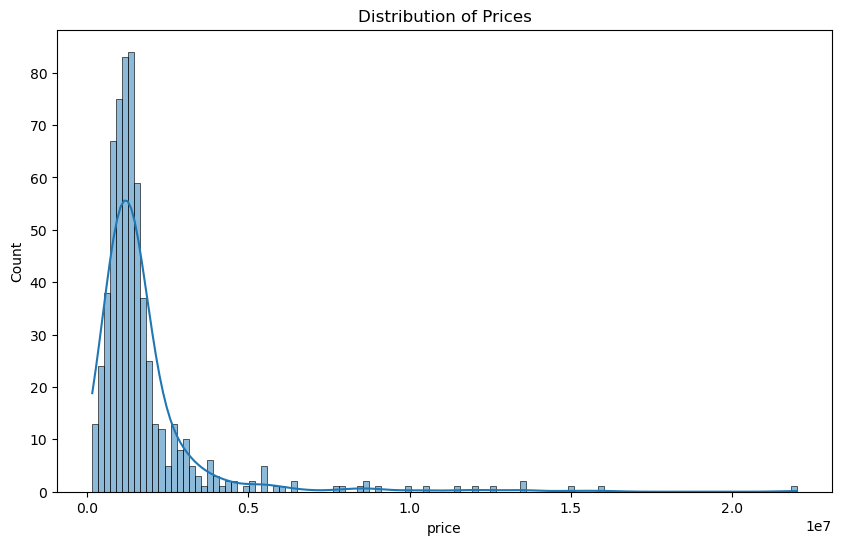

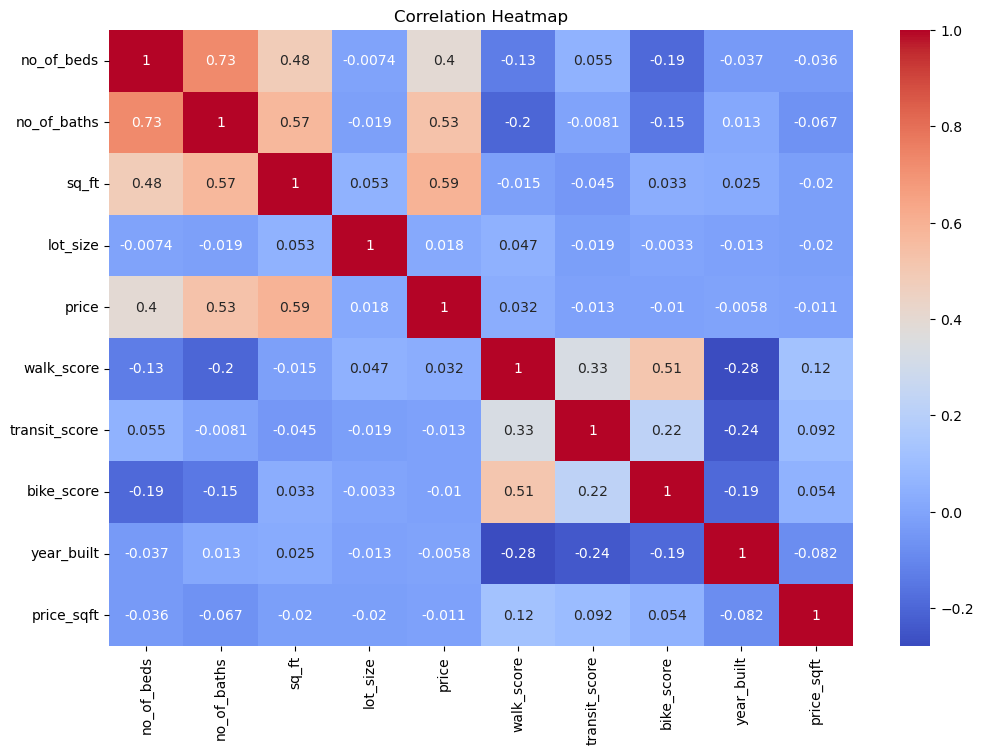

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(data_frame['price'], kde=True)
plt.title('Distribution of Prices')
plt.show()

# Heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


##  1. Relationship between property size (sq_ft) and its price

In [65]:
# Correlation
correlation = data_frame['sq_ft'].corr(data_frame['price'])
print(f"Correlation: {correlation}")

# Regression
X = sm.add_constant(data_frame['sq_ft']) # Adding constant for intercept
model = sm.OLS(data_frame['price'], X).fit()
print(model.summary())


Correlation: 0.5763325265971174
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     305.9
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           6.79e-56
Time:                        06:56:20   Log-Likelihood:                -9691.3
No. Observations:                 617   AIC:                         1.939e+04
Df Residuals:                     615   BIC:                         1.940e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.851e+0

## 2. Influence of year_built on price_sqft

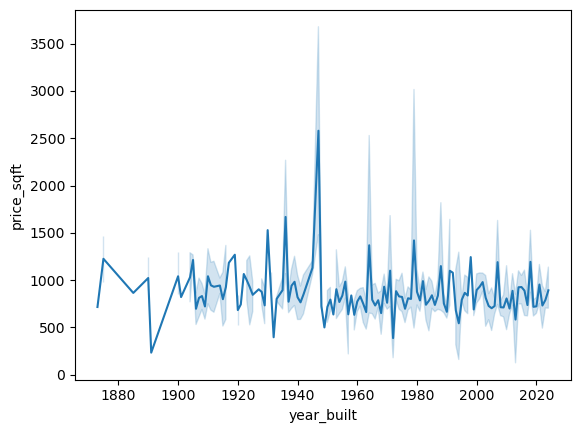

                            OLS Regression Results                            
Dep. Variable:             price_sqft   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     4.160
Date:                Sat, 07 Oct 2023   Prob (F-statistic):             0.0418
Time:                        07:00:05   Log-Likelihood:                -4660.2
No. Observations:                 617   AIC:                             9324.
Df Residuals:                     615   BIC:                             9333.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2806.5294    952.645      2.946      0.0

In [68]:
# Visualization
sns.lineplot(data=data_frame, x='year_built', y='price_sqft')
plt.show()

# Regression
X = sm.add_constant(data_frame['year_built'])
model = sm.OLS(data_frame['price_sqft'], X).fit()
print(model.summary())


## 3. Properties with higher walk, transit, and bike scores and their prices

In [70]:
# Grouping & Descriptive Stats
for score in ['Walk_rating_scale', 'Transit_rating_scale', 'Bike_rating_scale']:
    print(data_frame.groupby(score)['price'].mean())

# ANOVA (Example for Walk_rating_scale)
f_stat, p_val = f_oneway(*[data_frame['price'][data_frame['Walk_rating_scale'] == rating] for rating in data_frame['Walk_rating_scale'].unique()])
print(f"F-statistic: {f_stat}, P-value: {p_val}")


Walk_rating_scale
Car-dependent        1.586110e+06
NA                   1.322380e+06
Somewhat walkable    1.354066e+06
Very walkable        1.665430e+06
Walker's paradise    2.197899e+06
Name: price, dtype: float64
Transit_rating_scale
Bikeable             1.011440e+06
Biker's paradise     1.346627e+06
Excellent transit    2.276961e+06
Good transit         1.523565e+06
Minimal transit      2.348792e+06
NA                   1.798253e+06
Rider's paradise     1.907778e+06
Some transit         1.479411e+06
Somewhat bikeable    2.213875e+06
Very bikeable        1.398906e+06
Name: price, dtype: float64
Bike_rating_scale
Bikeable             1.699050e+06
Biker's paradise     1.809566e+06
NA                   1.633753e+06
Somewhat bikeable    1.958427e+06
Very bikeable        1.832736e+06
Name: price, dtype: float64
F-statistic: 4.117326753424671, P-value: 0.0026678453355656008/n


## 4. Impact of property type on price per square foot

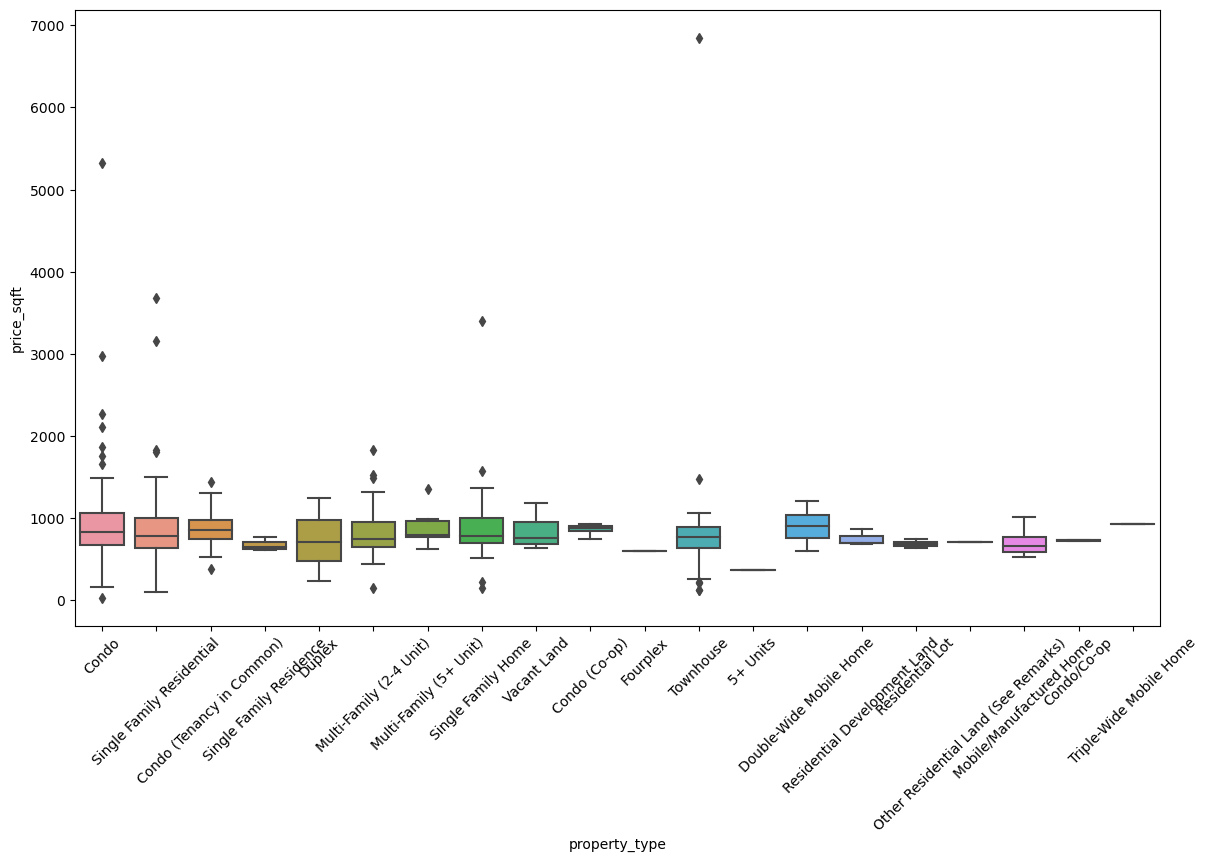

F-statistic: 0.29488484293201306, P-value: 0.9986253884597736


<Figure size 640x480 with 0 Axes>

In [76]:
# Boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(data= data_frame, x='property_type', y='price_sqft')
plt.xticks(rotation=45)
plt.show()
plt.tight_layout()

# ANOVA
f_stat, p_val = f_oneway(*[data_frame['price_sqft'][data_frame['property_type'] == type_] for type_ in data_frame['property_type'].unique()])
print(f"F-statistic: {f_stat}, P-value: {p_val}")


## 5. Expensive properties by zip codes or cities

In [78]:
# Grouping & Descriptive Stats
print(data_frame.groupby('zipcode')['price'].mean())
print(data_frame.groupby('city')['price'].mean())


zipcode
94102    8.943900e+05
94103    2.349921e+06
94105    2.141528e+06
94107    1.395650e+06
94108    5.215000e+06
94109    1.438147e+06
94110    1.667757e+06
94111    7.050000e+05
94112    1.031222e+06
94114    2.550867e+06
94115    3.173700e+06
94116    1.678994e+06
94117    1.784267e+06
94118    2.519534e+06
94121    2.631000e+06
94122    1.490667e+06
94123    3.978530e+06
94124    7.281250e+05
94127    1.649000e+06
94130    2.149000e+06
94131    3.737250e+06
94132    1.503843e+06
94133    4.244000e+06
94134    1.081000e+06
94158    1.139179e+06
94536    1.677028e+06
94538    1.315714e+06
94539    1.989321e+06
94555    1.074725e+06
94560    1.158990e+06
94568    1.441871e+06
94583    4.856940e+05
94587    3.000000e+05
94588    7.690000e+05
95008    6.250000e+05
95035    1.971222e+06
95050    1.399000e+06
95110    8.950000e+05
95111    5.694500e+05
95112    1.037000e+06
95116    6.980000e+05
95117    1.732296e+06
95118    1.001333e+06
95120    1.224500e+06
95121    5.825000e+05
95

## 6. Influence of number of beds and baths on price

In [79]:
X = sm.add_constant(data_frame[['no_of_beds', 'no_of_baths']])
model = sm.OLS(data_frame['price'], X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     68.94
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           9.78e-28
Time:                        07:07:46   Log-Likelihood:                -9753.3
No. Observations:                 617   AIC:                         1.951e+04
Df Residuals:                     614   BIC:                         1.953e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.458e+05   1.87e+05     -0.780      

## 7. How different cities value walkability in terms of square foot prices, and how the valuation may differ depending on the walkability rating.

C:\Users\STSC\AppData\Local\Temp\ipykernel_4032\2013904272.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_frame, x='city', y='price_sqft', hue='Walk_rating_scale', ci=None)


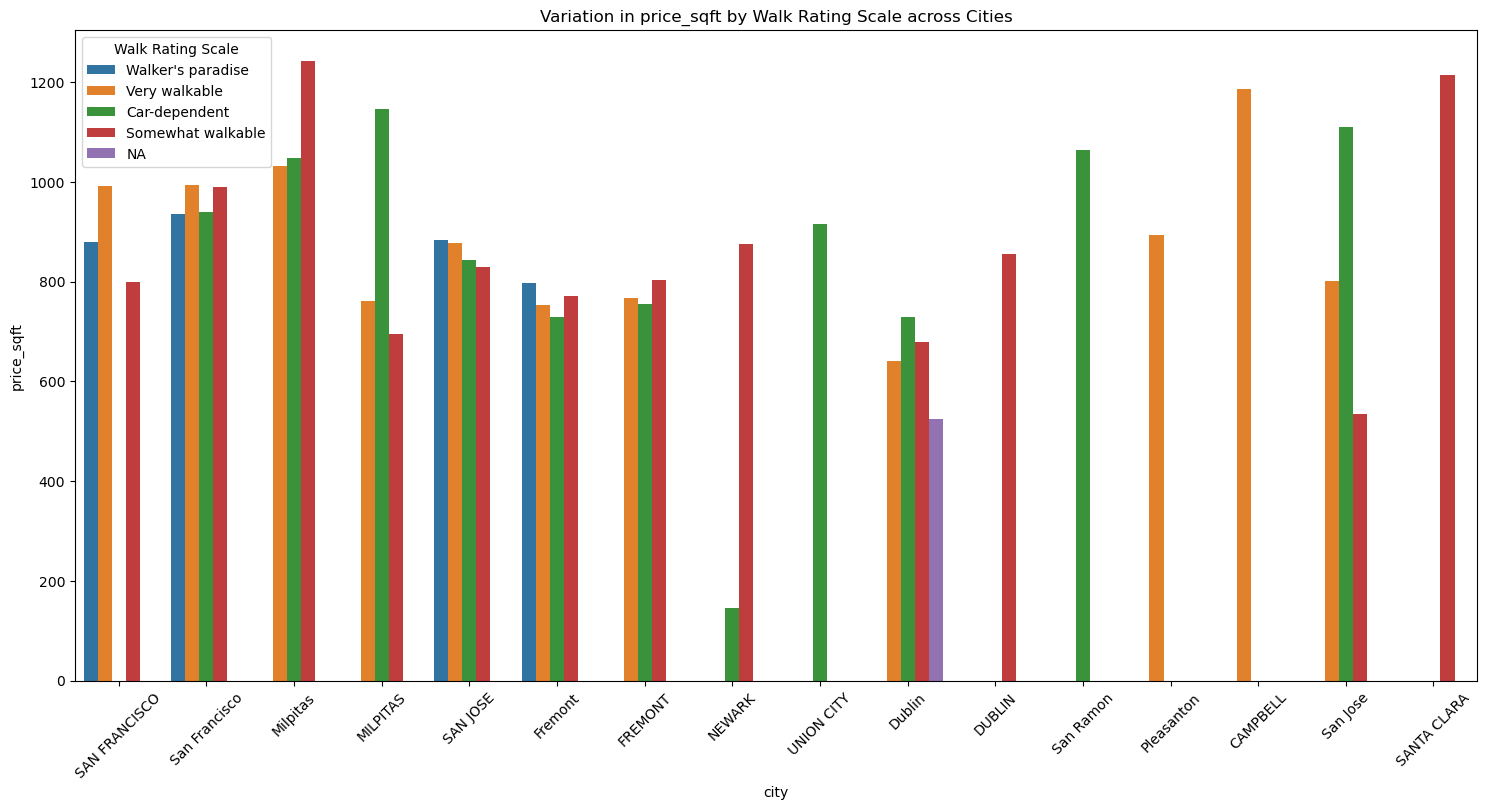

In [84]:
plt.figure(figsize=(15, 8))
sns.barplot(data=data_frame, x='city', y='price_sqft', hue='Walk_rating_scale', ci=None)
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Variation in price_sqft by Walk Rating Scale across Cities')
plt.legend(title='Walk Rating Scale')
plt.show()

In [ ]:
# Drop the specified columns
data_frame = data_frame.drop(['Walk_rating_scale', 'Transit_rating_scale', 'Bike_rating_scale'], axis=1)

In [105]:
# Convert categorical columns to dummy variables
data_dummies = pd.get_dummies(data_frame, drop_first=True)  # drop_first to avoid the dummy variable trap

# Split the data into train and test sets
X = data_dummies.drop('price', axis=1)  # Drop the dependent variable
y = data_dummies['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ensure there's no missing or infinite values before running regression
if not X_train.isnull().sum().sum() and not (X_train == np.inf).sum().sum():
    # Add a constant column for the intercept
    X_train_const = sm.add_constant(X_train)
    
    # Build the regression model
    model = sm.OLS(y_train, X_train_const).fit()

    # Display the results
    print(model.summary())
else:
    print("Data contains NaN or inf values. Clean the data first.")


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     6.614
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           1.73e-37
Time:                        07:27:31   Log-Likelihood:                -6685.2
No. Observations:                 431   AIC:                         1.355e+04
Df Residuals:                     343   BIC:                         1.390e+04
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

## How does property age relate to its price?

Correlation between Property Age and Price: 0.005808210664592335


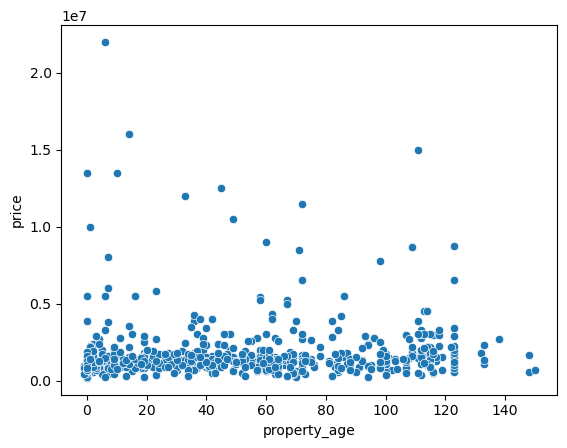

In [109]:
data_frame['property_age'] = 2023 - data_frame['year_built']
sns.scatterplot(data=data_frame, x='property_age', y='price')
correlation = data_frame['property_age'].corr(data_frame['price'])
print(f"Correlation between Property Age and Price: {correlation}")


## How does the livability (combined scores of walk, bike, and transit) affect the price per square foot?

<Axes: xlabel='livability_score', ylabel='price_sqft'>

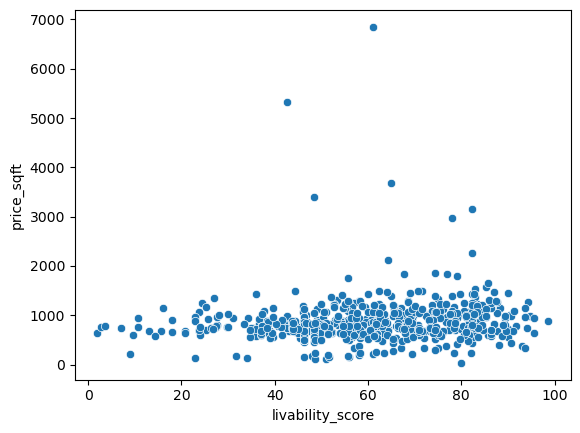

In [110]:
data_frame['livability_score'] = data_frame[['walk_score', 'bike_score', 'transit_score']].mean(axis=1)
sns.scatterplot(data=data_frame, x='livability_score', y='price_sqft')


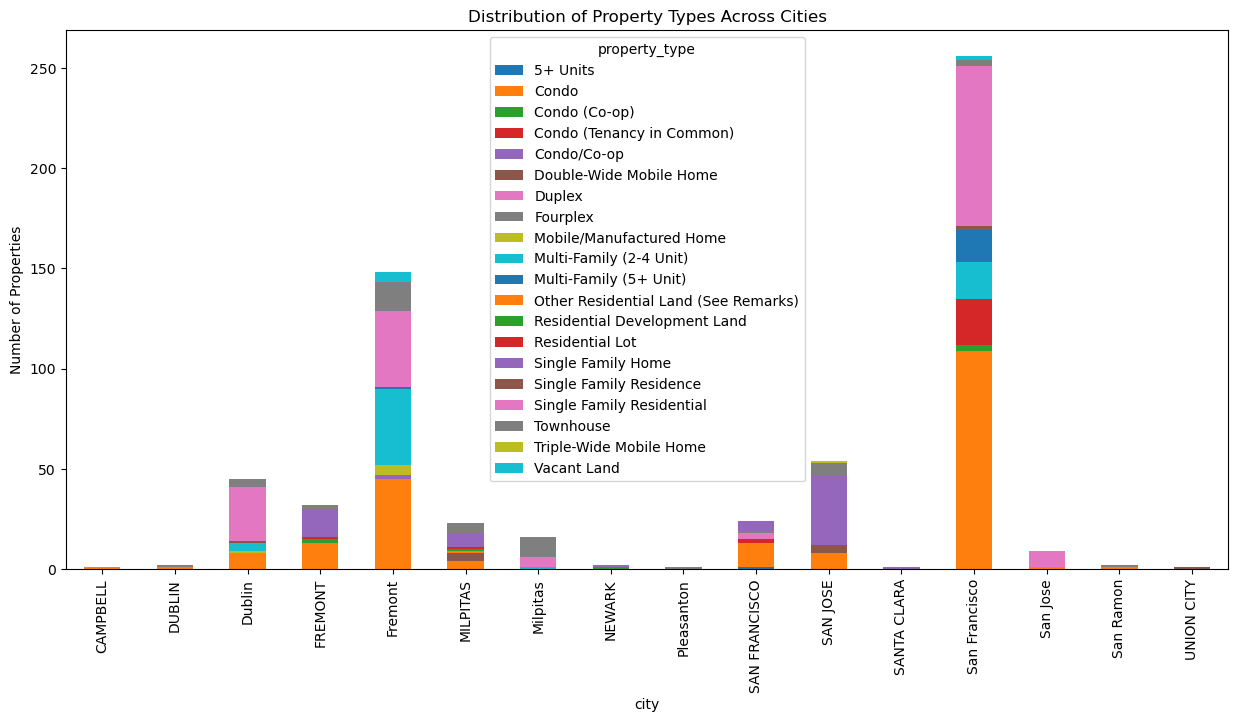

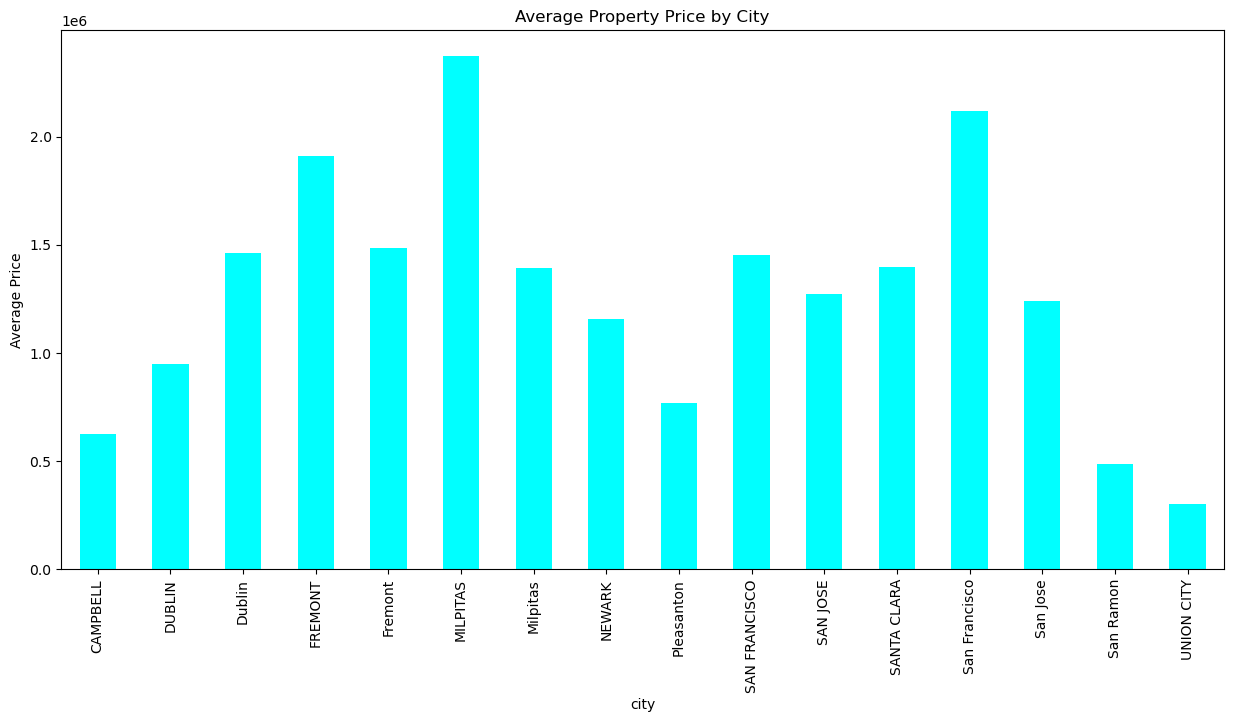

In [113]:
# For the stacked bar chart showing property type distribution across cities:
property_counts = data_frame.groupby(['city', 'property_type']).size().unstack().fillna(0)
property_counts.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title("Distribution of Property Types Across Cities")
plt.ylabel("Number of Properties")
plt.show()

# For the bar chart showing average property price for each city:
avg_price_per_city = data_frame.groupby('city')['price'].mean()
avg_price_per_city.plot(kind='bar', color='cyan', figsize=(15, 7))
plt.title("Average Property Price by City")
plt.ylabel("Average Price")
plt.show()


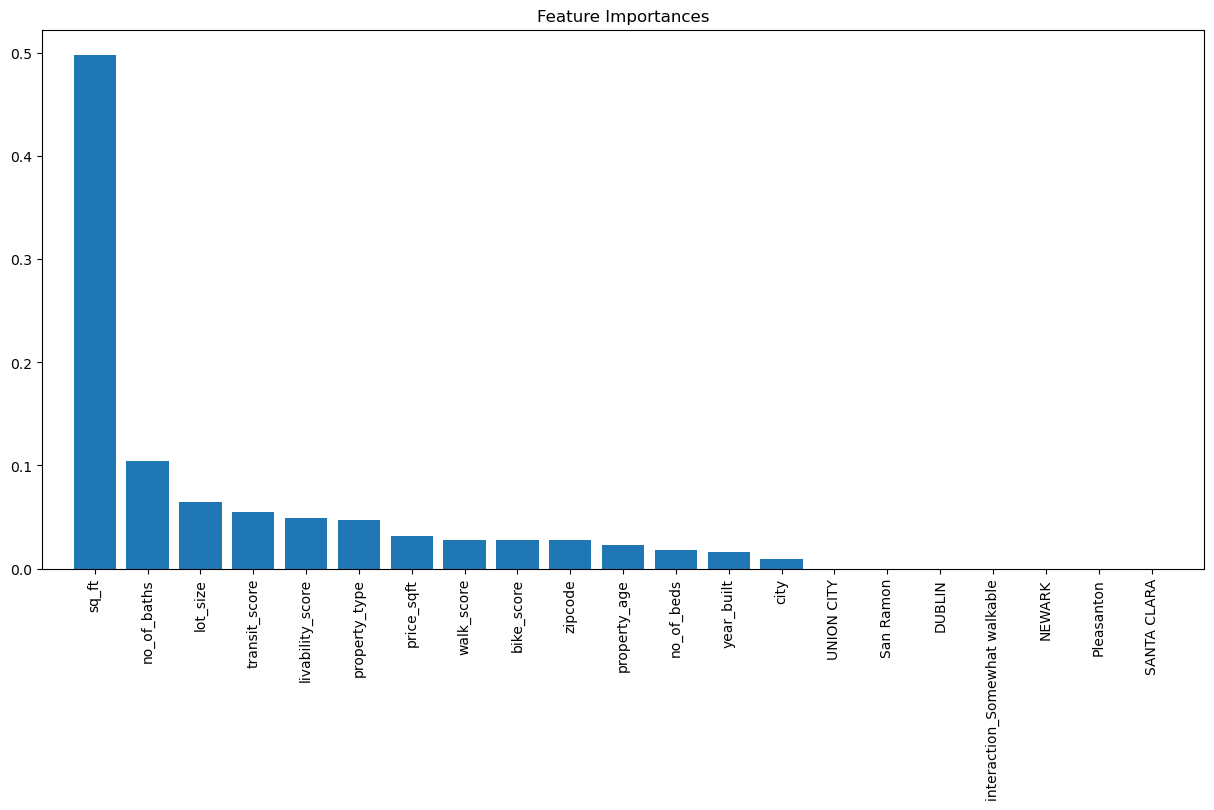

In [115]:
# Convert categorical columns to dummy variables
data_dummies = pd.get_dummies(data_frame, drop_first=True)  # drop_first to avoid the dummy variable trap

# Split the data into train and test sets
X = data_dummies.drop('price', axis=1)  # Drop the dependent variable
y = data_dummies['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train a Random Forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 3: Extract and visualize feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(15, 7))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation='vertical')
plt.xlim([-1, X_train.shape[1]])
plt.show()


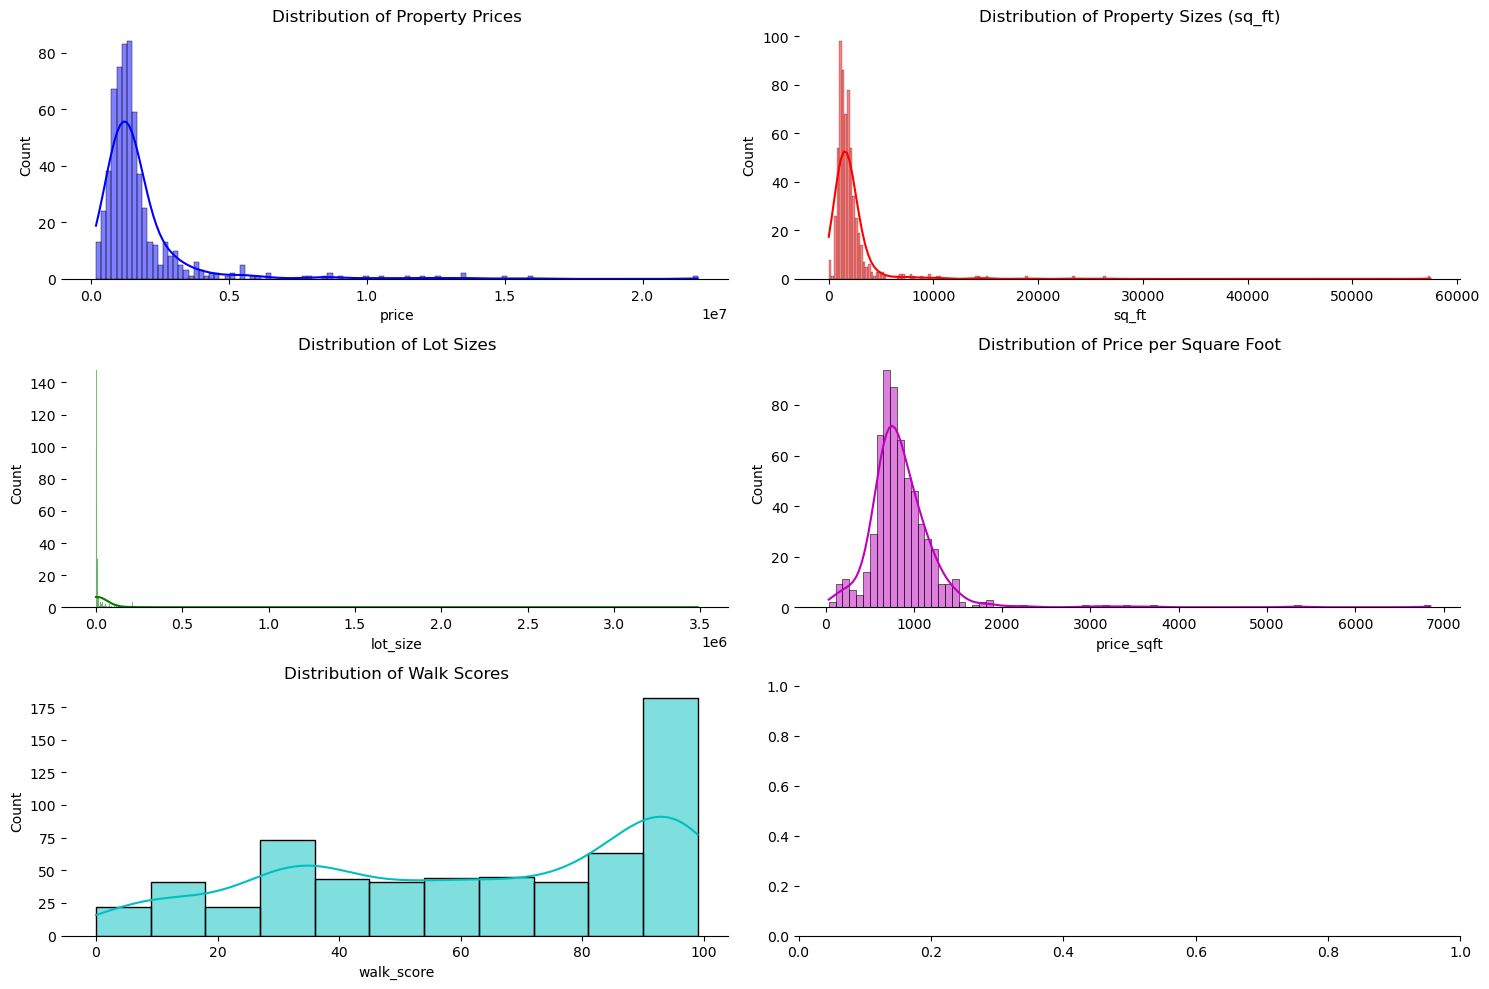

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure with multiple subplots
f, axes = plt.subplots(3, 2, figsize=(15, 10), sharex=False)
sns.despine(left=True)

# Plotting the histogram and density plot for each column

# Property Prices
sns.histplot(data_frame['price'], ax=axes[0, 0], kde=True, color="b")
axes[0, 0].set_title("Distribution of Property Prices")

# Size of Properties
sns.histplot(data_frame['sq_ft'], ax=axes[0, 1], kde=True, color="r")
axes[0, 1].set_title("Distribution of Property Sizes (sq_ft)")

# Lot Size
sns.histplot(data_frame['lot_size'], ax=axes[1, 0], kde=True, color="g")
axes[1, 0].set_title("Distribution of Lot Sizes")

# Price per square foot
sns.histplot(data_frame['price_sqft'], ax=axes[1, 1], kde=True, color="m")
axes[1, 1].set_title("Distribution of Price per Square Foot")

# Walk Score
sns.histplot(data_frame['walk_score'], ax=axes[2, 0], kde=True, color="c")
axes[2, 0].set_title("Distribution of Walk Scores")

# Transit and Bike Scores can be similarly plotted by replicating the pattern above

plt.tight_layout()
plt.show()
